<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Week5_Day1_Intro_to_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5, Day 1: Introduction to Deep Learning

## Learning Objectives
- Understand neural network fundamentals
- Learn about activation functions
- Master backpropagation concepts
- Practice implementing basic neural networks

## Topics Covered
1. Neural Network Basics
2. Activation Functions
3. Forward and Backward Propagation
4. Training Neural Networks

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

## 1. Neural Network Basics

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


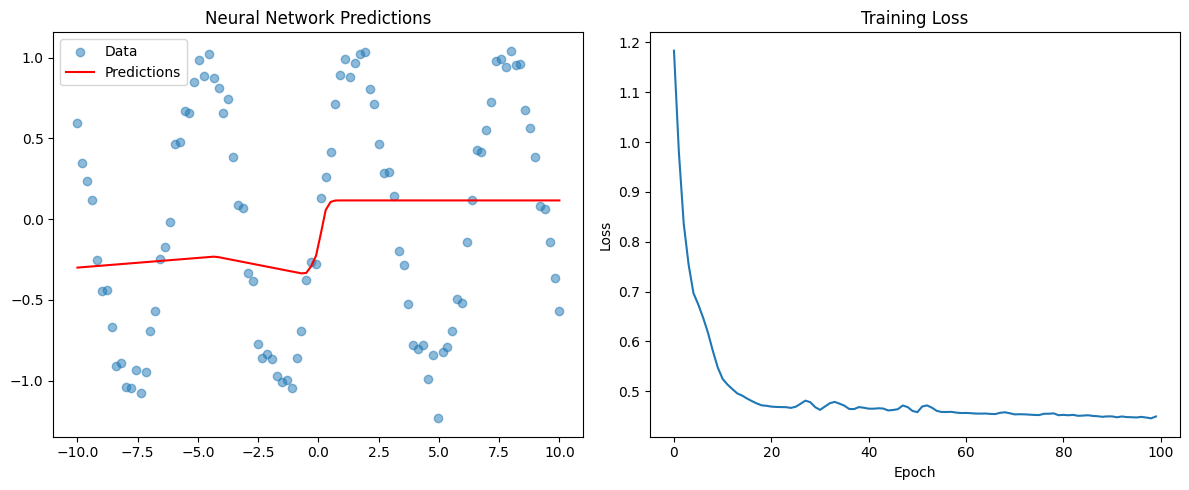


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

In [ ]:
def neural_network_basics():
    # Generate simple dataset
    np.random.seed(42)
    X = np.linspace(-10, 10, 100).reshape(-1, 1)
    y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

    # Create a simple neural network
    model = Sequential([
        Dense(10, activation='relu', input_shape=(1,)),
        Dense(10, activation='relu'),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    history = model.fit(X, y, epochs=100, verbose=0)

    # Make predictions
    y_pred = model.predict(X)

    # Plot results
    plt.figure(figsize=(12, 5))

    # Data and predictions
    plt.subplot(121)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X, y_pred, 'r-', label='Predictions')
    plt.title('Neural Network Predictions')
    plt.legend()

    # Training loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

    # Print model summary
    print("\nModel Summary:")
    model.summary()

neural_network_basics()

In [ ]:
# prompt: explain to me - this code - def neural_network_basics():
#     # Generate simple dataset
#     np.random.seed(42)
#     X = np.linspace(-10, 10, 100).reshape(-1, 1)
#     y = np.sin(X) + np.random.normal(0, 0.1, X.shape)
#     # Create a simple neural network
#     model = Sequential([
#         Dense(10, activation='relu', input_shape=(1,)),
#         Dense(10, activation='relu'),
#         Dense(1)
#     ])
#     # Compile model
#     model.compile(optimizer='adam', loss='mse')
#     # Train model
#     history = model.fit(X, y, epochs=100, verbose=0)
#     # Make predictions
#     y_pred = model.predict(X)
#     # Plot results
#     plt.figure(figsize=(12, 5))
#     # Data and predictions
#     plt.subplot(121)
#     plt.scatter(X, y, alpha=0.5, label='Data')
#     plt.plot(X, y_pred, 'r-', label='Predictions')
#     plt.title('Neural Network Predictions')
#     plt.legend()
#     # Training loss
#     plt.subplot(122)
#     plt.plot(history.history['loss'])
#     plt.title('Training Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.tight_layout()
#     plt.show()
#     # Print model summary
#     print("\nModel Summary:")
#     model.summary()
# neural_network_basics()

import numpy as np
This code defines and executes a function `neural_network_basics` that demonstrates a basic neural network using TensorFlow/Keras. Let's break down the code step-by-step:

1. **Import Libraries:** The code begins by importing necessary libraries:
   - `numpy` for numerical operations.
   - `pandas` for data manipulation (though not used in this specific function).
   - `matplotlib.pyplot` for plotting.
   - `seaborn` for statistical data visualization (not used here).
   - `tensorflow` and `keras` for building and training the neural network.

2. **`neural_network_basics()` Function:**
   - **Data Generation:**
     - `np.random.seed(42)`: Sets a random seed for reproducibility.  The same random numbers will be generated each time the code is run.
     - `X = np.linspace(-10, 10, 100).reshape(-1, 1)`: Creates an array `X` of 100 evenly spaced values between -10 and 10. `.reshape(-1, 1)` reshapes it into a column vector (a matrix with 100 rows and 1 column), which is the expected input format for many machine learning models.
     - `y = np.sin(X) + np.random.normal(0, 0.1, X.shape)`: Creates the target variable `y`.  It's the sine of `X` plus some random noise drawn from a normal distribution with a mean of 0 and a standard deviation of 0.1.  This simulates real-world data, which is often noisy.

   - **Model Creation:**
     - `model = Sequential(...)`: Creates a sequential model in Keras. This means the layers are stacked one after another.
     - `Dense(10, activation='relu', input_shape=(1,))`: Adds the first dense (fully connected) layer with 10 neurons, ReLU activation function, and an input shape of (1,).  The input shape specifies that each input data point has one feature (because `X` is a column vector).
     - `Dense(10, activation='relu')`: Adds a second hidden layer with 10 neurons and ReLU activation.
     - `Dense(1)`: Adds the output layer with a single neuron.  No activation is specified here; this implies a linear activation, which is suitable for regression tasks (predicting a continuous value).

   - **Model Compilation:**
     - `model.compile(optimizer='adam', loss='mse')`: Configures the model for training.
       - `optimizer='adam'`: Uses the Adam optimizer, a popular optimization algorithm.
       - `loss='mse'`: Uses mean squared error as the loss function, which is common for regression.

   - **Model Training:**
     - `history = model.fit(X, y, epochs=100, verbose=0)`: Trains the model.
       - `X`, `y`: Input and target data.
       - `epochs=100`:  Trains the model for 100 epochs (passes through the entire dataset).
       - `verbose=0`: Suppresses training output.

   - **Prediction:**
     - `y_pred = model.predict(X)`: Uses the trained model to predict values for the input data `X`.

   - **Plotting:**
     - The code creates two subplots:
       - The first subplot displays the original data (`X`, `y`) as a scatter plot and the model's predictions (`X`, `y_pred`) as a line.
       - The second subplot shows the training loss over epochs.  A decreasing loss indicates that the model is learning.

   - **Model Summary:**
     - `model.summary()`: Prints a summary of the model architecture, including the number of layers, neurons, and parameters.


3. **Function Call:**  `neural_network_basics()` executes the function, running the entire process from data generation to model training and visualization.

In essence, this code creates a simple neural network to approximate a sine wave with added noise. It trains the network, visualizes its predictions and the training process, and provides a model summary.


## 2. Activation Functions

In [ ]:
def activation_functions():
    # Generate input values
    x = np.linspace(-5, 5, 100)

    # Define activation functions
    def relu(x):
        return np.maximum(0, x)

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def tanh(x):
        return np.tanh(x)

    # Plot activation functions
    plt.figure(figsize=(15, 5))

    # ReLU
    plt.subplot(131)
    plt.plot(x, relu(x))
    plt.title('ReLU')
    plt.grid(True)

    # Sigmoid
    plt.subplot(132)
    plt.plot(x, sigmoid(x))
    plt.title('Sigmoid')
    plt.grid(True)

    # Tanh
    plt.subplot(133)
    plt.plot(x, tanh(x))
    plt.title('Tanh')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print characteristics
    print("Activation Function Characteristics:")
    print("\nReLU:")
    print("- Output range: [0, ∞)")
    print("- Non-linear")
    print("- Helps solve vanishing gradient")

    print("\nSigmoid:")
    print("- Output range: (0, 1)")
    print("- S-shaped curve")
    print("- Used in binary classification")

    print("\nTanh:")
    print("- Output range: (-1, 1)")
    print("- Zero-centered")
    print("- Often better than sigmoid")

activation_functions()

## 3. Forward and Backward Propagation

In [ ]:
def simple_neural_network():
    # Simple 2-layer neural network implementation
    class SimpleNN:
        def __init__(self, input_size, hidden_size, output_size):
            self.W1 = np.random.randn(input_size, hidden_size) * 0.01
            self.b1 = np.zeros((1, hidden_size))
            self.W2 = np.random.randn(hidden_size, output_size) * 0.01
            self.b2 = np.zeros((1, output_size))

        def forward(self, X):
            # Forward propagation
            self.z1 = np.dot(X, self.W1) + self.b1
            self.a1 = np.maximum(0, self.z1)  # ReLU
            self.z2 = np.dot(self.a1, self.W2) + self.b2
            self.a2 = self.z2  # Linear output
            return self.a2

        def backward(self, X, y, learning_rate=0.01):
            m = X.shape[0]

            # Backward propagation
            dz2 = self.a2 - y
            dW2 = np.dot(self.a1.T, dz2) / m
            db2 = np.sum(dz2, axis=0, keepdims=True) / m

            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * (self.z1 > 0)  # ReLU derivative
            dW1 = np.dot(X.T, dz1) / m
            db1 = np.sum(dz1, axis=0, keepdims=True) / m

            # Update parameters
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1

    # Generate data
    X = np.random.randn(100, 2)
    y = np.sum(X**2, axis=1, keepdims=True)

    # Create and train network
    nn = SimpleNN(2, 5, 1)
    losses = []

    # Training loop
    for i in range(1000):
        # Forward pass
        pred = nn.forward(X)

        # Compute loss
        loss = np.mean((pred - y)**2)
        losses.append(loss)

        # Backward pass
        nn.backward(X, y)

    # Plot training progress
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('MSE Loss')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

simple_neural_network()

## Practical Exercises

In [ ]:
# Exercise 1: Binary Classification

def binary_classification_exercise():
    # Generate spiral dataset
    def generate_spiral_data(n_points=100, noise=0.5):
        points = []
        labels = []

        for i in range(2):
            for j in range(n_points):
                angle = j / n_points * 2 * np.pi
                radius = j / n_points
                point = [
                    radius * np.cos(angle + i * np.pi),
                    radius * np.sin(angle + i * np.pi)
                ]
                points.append(point)
                labels.append(i)

        return np.array(points), np.array(labels)

    # Generate data
    X, y = generate_spiral_data()

    # Plot data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')
    plt.title('Spiral Dataset')
    plt.legend()
    plt.show()

    print("Task: Create a neural network for binary classification")
    print("1. Design network architecture")
    print("2. Choose appropriate activation functions")
    print("3. Train the model")
    print("4. Visualize decision boundary")

    # Your code here

binary_classification_exercise()

In [ ]:
# Exercise 2: Function Approximation

def function_approximation_exercise():
    # Generate data
    X = np.linspace(-5, 5, 200).reshape(-1, 1)
    y = 0.2 * X**3 + 0.5 * X**2 - X + 2 + np.random.normal(0, 1, X.shape)

    # Plot data
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.title('Complex Function Data')
    plt.show()

    print("Task: Create a neural network for function approximation")
    print("1. Design network architecture")
    print("2. Experiment with different layer sizes")
    print("3. Train the model")
    print("4. Compare with true function")

    # Your code here

function_approximation_exercise()

## MCQ Quiz

1. What is a neuron in a neural network?
   - a) A data point
   - b) A mathematical function
   - c) A weight matrix
   - d) An activation function

2. Which activation function is most commonly used in hidden layers?
   - a) Linear
   - b) ReLU
   - c) Sigmoid
   - d) Tanh

3. What is backpropagation used for?
   - a) Forward pass
   - b) Weight initialization
   - c) Gradient computation
   - d) Data preprocessing

4. What is the vanishing gradient problem?
   - a) Loss becomes zero
   - b) Gradients become too small
   - c) Network becomes too large
   - d) Learning rate is too high

5. Which is NOT a hyperparameter in neural networks?
   - a) Learning rate
   - b) Number of layers
   - c) Gradient values
   - d) Batch size

6. What does the universal approximation theorem state?
   - a) Neural networks can solve any problem
   - b) Neural networks can approximate any continuous function
   - c) Neural networks always converge
   - d) Neural networks are always optimal

7. Why is ReLU preferred over sigmoid?
   - a) More accurate
   - b) Faster computation
   - c) Reduces vanishing gradient
   - d) Better for classification

8. What is weight initialization important for?
   - a) Final accuracy
   - b) Training speed
   - c) Network size
   - d) Both a and b

9. Which layer typically has no activation function?
   - a) Input layer
   - b) Hidden layer
   - c) Output layer (regression)
   - d) All layers need activation

10. What is the purpose of bias in neural networks?
    - a) Regularization
    - b) Shift activation function
    - c) Speed up training
    - d) Reduce overfitting

Answers: 1-b, 2-b, 3-c, 4-b, 5-c, 6-b, 7-c, 8-d, 9-c, 10-b